### *The thought behind this project was to derive as much insights as I could from the dataset, I will definately be visiting this some time in the future*

In [1]:
#import necessary libraries for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the dataset that will be worked on

housing = pd.read_csv('nigeria_houses_data.csv')

#### *Exploratory Data Analysis*

In [3]:
housing.head() #the first 5 records in the dataframe

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [4]:
housing.columns #the column names in the dataframe

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price'],
      dtype='object')

In [5]:
housing.rename(columns = {'title':'house_type'}, inplace=True) #changing the name of a column from title to house_type.

In [6]:
housing.columns #checking to confirm the changes we made

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'house_type',
       'town', 'state', 'price'],
      dtype='object')

In [7]:
housing.shape #this returns the number of rows and columns in the dataframe, in a matrix form

(24326, 8)

In [8]:
housing.info() #this returns the various columns, their names, non-null count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   house_type     24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [9]:
housing.isnull().sum() # this is to check for null values in the dataframe

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
house_type       0
town             0
state            0
price            0
dtype: int64

<AxesSubplot:>

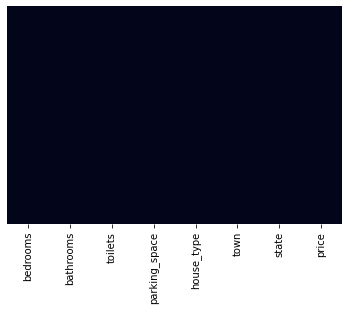

In [10]:
sns.heatmap(housing.isnull(), yticklabels=False, cbar=False)

#### *The output above is blank because there is no null value in the dataframe, the presence of null values would be seen by lines under each column.*

In [11]:
housing.nunique() #to count the number of unique values in each column

bedrooms           9
bathrooms          9
toilets            9
parking_space      9
house_type         7
town             189
state             25
price            539
dtype: int64

In [12]:
housing['formatted_price'] = housing['price'].apply(lambda x: ' {:,.2f}'.format(x)) 

#### *To format the values in the price column so as to make it legible*

In [13]:
housing.head() #to confirm the changes made

,bedrooms,bathrooms,toilets,parking_space,house_type,town,state,price,formatted_price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,"450,000,000.00"
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,"800,000,000.00"
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,"120,000,000.00"
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,"40,000,000.00"
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,"75,000,000.00"


In [14]:
housing.info() #further confirmation in term of the number of non null values and data type in the newly created column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         24326 non-null  float64
 1   bathrooms        24326 non-null  float64
 2   toilets          24326 non-null  float64
 3   parking_space    24326 non-null  float64
 4   house_type       24326 non-null  object 
 5   town             24326 non-null  object 
 6   state            24326 non-null  object 
 7   price            24326 non-null  float64
 8   formatted_price  24326 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.7+ MB


### *Let's visualize the count of records/properties per state, arranged in a descending order*

<AxesSubplot:xlabel='count', ylabel='state'>

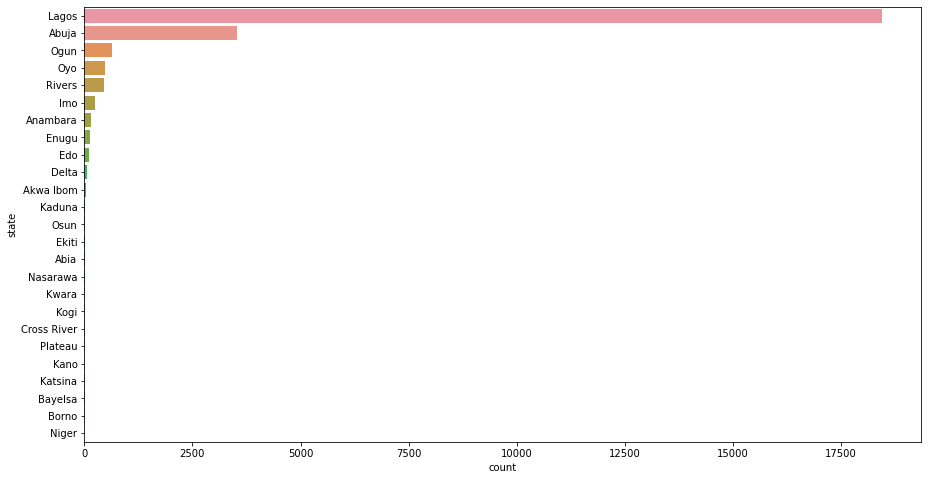

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(y='state', data=housing, order=housing['state'].value_counts(ascending=False).index)

#### *To return the actual values from the countplot above*

In [16]:
housing.groupby('state').size().sort_values(ascending=False) 

state
Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Kwara              9
Nasarawa           9
Abia               9
Kogi               8
Kano               2
Katsina            2
Cross River        2
Borno              2
Bayelsa            2
Plateau            2
Niger              1
dtype: int64

### *Let's visualize the count of house type, arranged in a descending order*

<AxesSubplot:xlabel='count', ylabel='house_type'>

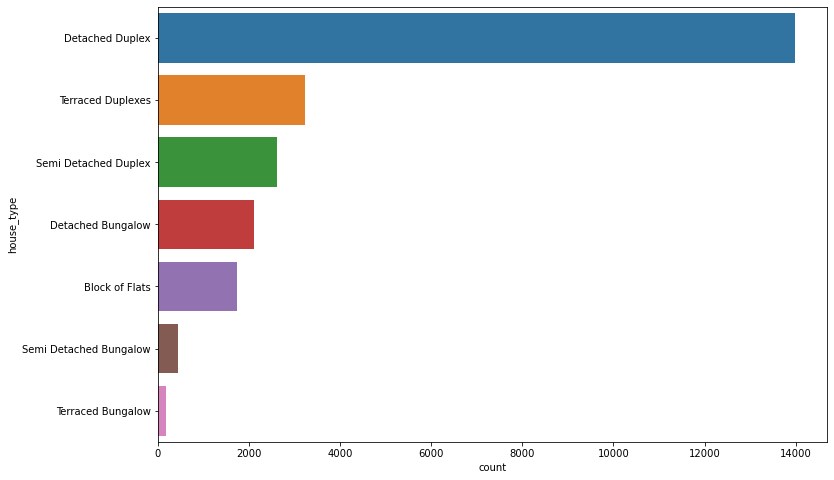

In [17]:
plt.figure(figsize=(12,8))
sns.countplot(y='house_type', data=housing, order=housing['house_type'].value_counts(ascending=False).index)

#### *To return the actual values from the countplot above*

In [18]:
housing.groupby('house_type').size().sort_values(ascending=False)

house_type
Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
dtype: int64

### *Count the various house types found in each state, arranged in a descending order*

In [19]:
housing.groupby('state')['house_type'].value_counts().sort_values(ascending=False)


state    house_type          
Lagos    Detached Duplex         11802
         Semi Detached Duplex     2100
         Terraced Duplexes        2100
Abuja    Detached Duplex          1400
Lagos    Detached Bungalow        1052
                                 ...  
Katsina  Detached Duplex             1
         Detached Bungalow           1
Kano     Terraced Duplexes           1
         Detached Bungalow           1
Rivers   Terraced Bungalow           1
Name: house_type, Length: 113, dtype: int64

### *To find the record with the most expensive property*

In [20]:
housing.loc[housing['price'].idxmax()]

bedrooms                             7.0
bathrooms                            7.0
toilets                              8.0
parking_space                        8.0
house_type               Detached Duplex
town                               Ikoyi
state                              Lagos
price                    1800000000000.0
formatted_price     1,800,000,000,000.00
Name: 4096, dtype: object

### *Arrange the alphabetically by the town, with records in each town being arranged in a descending order*

In [21]:
housing.groupby('town').apply(lambda x: x.sort_values(by='price', ascending=False))

bedrooms  bathrooms  toilets  parking_space  \
town                                                            
Aba        15745       1.0        5.0      5.0            4.0   
           11863       3.0        3.0      4.0            6.0   
           21624       8.0        7.0      7.0            3.0   
           18484       4.0        5.0      5.0            4.0   
           3757        4.0        4.0      5.0            6.0   
...                    ...        ...      ...            ...   
Yaba       14387       2.0        2.0      3.0            4.0   
           1644        2.0        2.0      3.0            4.0   
Yenagoa    17282       7.0        8.0      8.0            2.0   
           10211       4.0        5.0      5.0            4.0   
Yewa South 8938        3.0        5.0      5.0            4.0   

                         house_type        town    state        price  \
town                                                                    
Aba        15745    Detached Duplex         Aba     Abia  350000000.0   
           11863     Block of Flats         Aba     Abia  120000000.0   
           21624  Detached Bungalow         Aba     Abia  100000000.0   
           18484     Block of Flats         Aba     Abia   80000000.0   
           3757     Detached Duplex         Aba     Abia   40000000.0   
...                             ...         ...      ...          ...   
Yaba       14387     Block of Flats        Yaba    Lagos   22000000.0   
           1644      Block of Flats        Yaba    Lagos   22000000.0   
Yenagoa    17282    Detached Duplex     Yenagoa  Bayelsa  160000000.0   
           10211     Block of Flats     Yenagoa  Bayelsa   20000000.0   
Yewa South 8938   Detached Bungalow  Yewa South     Ogun    1500000.0   

                  formatted_price  
town                               
Aba        15745   350,000,000.00  
           11863   120,000,000.00  
           21624   100,000,000.00  
           18484    80,000,000.00  
           3757     40,000,000.00  
...                           ...  
Yaba       14387    22,000,000.00  
           1644     22,000,000.00  
Yenagoa    17282   160,000,000.00  
           10211    20,000,000.00  
Yewa South 8938      1,500,000.00  

[24326 rows x 9 columns]

### *To get the neighborhood with the most expensive property and their respective state*

In [22]:
# Group the DataFrame by 'town' and calculate the mean price for each town
mean_prices = housing.groupby(['state','town'])['price'].mean()

# Sort the mean prices in descending order
sorted_mean_prices = mean_prices.sort_values(ascending=False)

sorted_mean_prices.head(10)

state     town            
Lagos     Ikoyi               2.269618e+09
Abuja     Maitama District    7.137640e+08
Lagos     Ifako-Ijaiye        6.918311e+08
Abuja     Asokoro District    6.021501e+08
          Guzape District     4.900121e+08
Anambara  Ikoyi               4.881667e+08
Abuja     Katampe             3.994369e+08
          Dakibiyu            3.872143e+08
Lagos     Apapa               3.010000e+08
Anambara  Yaba                3.000000e+08
Name: price, dtype: float64

#### *From the above output, it is obvious that the most expensive neighborhood in the data set is Ikoyi, Lagos, followed by Maitama Abuja*

#### *There seems to be an abnormality in the output above, with Ikoyi and Yaba appearing in Anambra, when it is obvious that Ikoyi and Yaba are a neighborhoods in Lagos, hence we will further investigate the towns in data set as a whole*

### *Given the new found issue, we have to map the entire towns to their respective states, meaning that somes state(s) will be removed from the dataframe*

In [23]:
housing['town'].unique()

array(['Mabushi', 'Katampe', 'Lekki', 'Ajah', 'Epe', 'Lokogoma District',
       'Oredo', 'Victoria Island (VI)', 'Mowe Ofada', 'Ikeja', 'Ikoyi',
       'Magodo', 'Kaura', 'Galadimawa', 'Gwarinpa', 'Abeokuta North',
       'Lugbe District', 'Ibeju Lekki', 'Yaba', 'Sango Ota',
       'Ifako-Ijaiye', 'Agege', 'Ikorodu', 'Jahi', 'Ibadan', 'Orozo',
       'Ifo', 'Owerri North', 'Guzape District', 'Idu Industrial',
       'Owerri Municipal', 'Isheri North', 'Utako', 'Port Harcourt',
       'Kuje', 'Isheri', 'Life Camp', 'Ipaja', 'Ado-Odo/Ota', 'Dape',
       'Mushin', 'Ejigbo', 'Isolo', 'Ojodu', 'Gaduwa', 'Enugu', 'Dakwo',
       'Asokoro District', 'Alimosho', 'Sagamu', 'Chikun', 'Egbeda',
       'Wuye', 'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Ibafo',
       'Surulere', 'Obio-Akpor', 'Ayobo', 'Apo', 'Mowe Town',
       'Ibadan South-West', 'Wuse 2', 'Durumi', 'Simawa', 'Arepo',
       'Ikotun', 'Oluyole', 'Maitama District', 'Maryland', 'Ido',
       'Karsana', 'Wuse', 'Ilorin West', 

In [24]:
town_to_state_mapping = {
    'Mabushi': 'Abuja',
    'Katampe': 'Abuja',
    'Lekki': 'Lagos',
    'Ajah': 'Lagos',
    'Epe': 'Lagos',
    'Lokogoma District': 'Abuja',
    'Oredo': 'Edo',
    'Victoria Island (VI)': 'Lagos',
    'Mowe Ofada': 'Ogun',
    'Ikeja': 'Lagos',
    'Ikoyi': 'Lagos',
    'Magodo': 'Lagos',
    'Kaura': 'Abuja',
    'Galadimawa': 'Abuja',
    'Gwarinpa': 'Abuja',
    'Abeokuta North': 'Ogun',
    'Lugbe District': 'Abuja',
    'Ibeju Lekki': 'Lagos',
    'Yaba': 'Lagos',
    'Sango Ota': 'Ogun',
    'Ifako-Ijaiye': 'Lagos',
    'Agege': 'Lagos',
    'Ikorodu': 'Lagos',
    'Jahi': 'Abuja',
    'Ibadan': 'Oyo',
    'Orozo': 'Abuja',
    'Ifo': 'Ogun',
    'Owerri North': 'Imo',
    'Guzape District': 'Abuja',
    'Idu Industrial': 'Abuja',
    'Owerri Municipal': 'Imo',
    'Isheri North': 'Lagos',
    'Utako': 'Abuja',
    'Port Harcourt': 'Rivers',
    'Kuje': 'Abuja',
    'Isheri': 'Lagos',
    'Life Camp': 'Abuja',
    'Ipaja': 'Lagos',
    'Ado-Odo/Ota': 'Ogun',
    'Dape': 'Abuja',
    'Mushin': 'Lagos',
    'Ejigbo': 'Lagos',
    'Isolo': 'Lagos',
    'Ojodu': 'Lagos',
    'Gaduwa': 'Abuja',
    'Enugu': 'Enugu',
    'Dakwo': 'Abuja',
    'Asokoro District': 'Abuja',
    'Alimosho': 'Lagos',
    'Sagamu': 'Ogun',
    'Chikun': 'Kaduna',
    'Egbeda': 'Lagos',
    'Wuye': 'Abuja',
    'Kubwa': 'Abuja',
    'Shomolu': 'Lagos',
    'Ogudu': 'Lagos',
    'Owerri West': 'Imo',
    'Ibafo': 'Ogun',
    'Surulere': 'Lagos',
    'Obio-Akpor': 'Rivers',
    'Ayobo': 'Lagos',
    'Apo': 'Abuja',
    'Mowe Town': 'Ogun',
    'Ibadan South-West': 'Oyo',
    'Wuse 2': 'Abuja',
    'Durumi': 'Abuja',
    'Simawa': 'Ogun',
    'Arepo': 'Ogun',
    'Ikotun': 'Lagos',
    'Oluyole': 'Oyo',
    'Maitama District': 'Abuja',
    'Maryland': 'Lagos',
    'Ido': 'Oyo',
    'Karsana': 'Abuja',
    'Wuse': 'Abuja',
    'Ilorin West': 'Kwara',
    'Kurudu': 'Abuja',
    'Karmo': 'Abuja',
    'Abeokuta South': 'Ogun',
    'KM 46': 'Lagos',
    'Gbagada': 'Lagos',
    'Idimu': 'Lagos',
    'Kaduna South': 'Kaduna',
    'Magboro': 'Ogun',
    'Gudu': 'Abuja',
    'Kukwaba': 'Abuja',
    'Mbora (Nbora)': 'Abuja',
    'Obafemi Owode': 'Ogun',
    'Jabi': 'Abuja',
    'Karu': 'Abuja',
    'Ojo': 'Lagos',
    'Garki': 'Abuja',
    'Aba': 'Abia',
    'Ogijo': 'Ogun',
    'Asaba': 'Delta',
    'Uyo': 'Akwa Ibom',
    'Kosofe': 'Lagos',
    'Oyigbo': 'Rivers',
    'Karshi': 'Nasarawa',
    'Osogbo': 'Osun',
    'Kado': 'Abuja',
    'Ilupeju': 'Lagos',
    'Afijio': 'Oyo',
    'Ketu': 'Lagos',
    'Ado-Ekiti': 'Ekiti',
    'Ibadan North': 'Oyo',
    'Egor': 'Edo',
    'Nyanya': 'Abuja',
    'Ibarapa North': 'Oyo',
    'Kyami': 'Abuja',
    'Ojota': 'Lagos',
    'Dutse': 'Abuja',
    'Nasarawa': 'Nasarawa',
    'Calabar': 'Cross River',
    'Kaduna North': 'Kaduna',
    'Eleme': 'Rivers',
    'Kafe': 'Abuja',
    'Oshodi': 'Lagos',
    'Dakibiyu': 'Abuja',
    'Amuwo Odofin': 'Lagos',
    'Ijede': 'Lagos',
    'Bwari': 'Abuja',
    'Dekina': 'Kogi',
    'Jos South': 'Plateau',
    'Agbara-Igbesa': 'Ogun',
    'Ijaiye': 'Lagos',
    'Kagini': 'Abuja',
    'Ohaji/Egbema': 'Imo',
    'Mpape': 'Abuja',
    'Apapa': 'Lagos',
    'Lagos Island': 'Lagos',
    'Gwagwalada': 'Abuja',
    'Ijoko': 'Ogun',
    'Diplomatic Zones': 'Abuja',
    'Akure': 'Ondo',
    'Ethiope West': 'Delta',
    'Badagry': 'Lagos',
    'Kano': 'Kano',
    'Ede South': 'Osun',
    'Ilorin South': 'Kwara',
    'Oke-Aro': 'Lagos',
    'Oke-Odo': 'Lagos',
    'Ikot Ekpene': 'Akwa Ibom',
    'Kusada': 'Katsina',
    'Akinyele': 'Oyo',
    'Kabusa': 'Abuja',
    'Dei-Dei': 'Abuja',
    'Eket': 'Akwa Ibom',
    'Egbe': 'Lagos',
    'Udu': 'Delta',
    'Ibadan North-East': 'Oyo',
    'Danja': 'Katsina',
    'Yewa South': 'Ogun',
    'Warri': 'Delta',
    'Duboyi': 'Abuja',
    'Jikwoyi': 'Abuja',
    'Oyo West': 'Oyo',
    'Agbara': 'Ogun',
    'Ovia North-East': 'Edo',
    'Yenagoa': 'Bayelsa',
    'Central Business District': 'Abuja',
    'Guzamala': 'Borno',
    'Lokoja': 'Kogi',
    'Jos North': 'Plateau',
    'Orile': 'Lagos',
    'Wumba': 'Abuja',
    'Ibadan North-West': 'Oyo',
    'Eko Atlantic City': 'Lagos',
    'Imota': 'Lagos',
    'Ikwerre': 'Rivers',
    'Keffi': 'Nasarawa',
    'Ilorin East': 'Kwara',
    'Uvwie': 'Delta',
    'Umuahia': 'Abia',
    'Ijesha': 'Lagos',
    'Okene': 'Kogi',
    'Aniocha South': 'Delta',
    'Ijebu Ode': 'Ogun',
    'Okpe': 'Delta',
    'Ughelli South': 'Delta',
    'Ewekoro': 'Ogun',
    'Nassarawa': 'Kano',
    'Mararaba': 'Nasarawa',
    'Uhunmwonde': 'Edo',
    'Ughelli North': 'Delta',
    'Ibeju': 'Lagos',
    'Abraka': 'Delta',
    'Paikoro': 'Niger',
    'Ikpoba Okha': 'Edo'
}


housing['state'] = housing['town'].map(town_to_state_mapping)

In [25]:
housing['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Rivers', 'Enugu',
       'Kaduna', 'Kwara', 'Abia', 'Delta', 'Akwa Ibom', 'Nasarawa',
       'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau', 'Ondo', 'Kano',
       'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

### *Having carried out the town to state mapping, we are confident that towns now belong to their correct state. Due to this change we have to redo some of the previously executed blocks of code*

### *Let's visualize the count of records/properties per state, arranged in a descending order*

<AxesSubplot:xlabel='count', ylabel='state'>

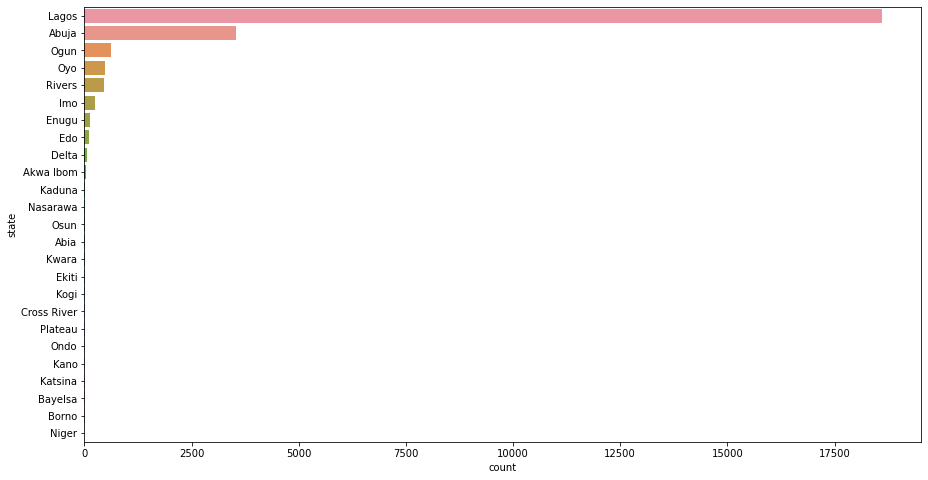

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(y='state', data=housing, order=housing['state'].value_counts(ascending=False).index)

#### *To return the actual values from the countplot above*

In [27]:
housing.groupby('state').size().sort_values(ascending=False)

state
Lagos          18596
Abuja           3530
Ogun             614
Oyo              477
Rivers           447
Imo              247
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Nasarawa          14
Osun              12
Kwara              9
Abia               9
Ekiti              9
Kogi               8
Katsina            2
Cross River        2
Ondo               2
Borno              2
Bayelsa            2
Plateau            2
Kano               2
Niger              1
dtype: int64

#### *Count the various house types found in each state, arranged in a descending order*

In [28]:
housing.groupby('state')['house_type'].value_counts().sort_values(ascending=False)

state    house_type          
Lagos    Detached Duplex         11833
         Terraced Duplexes        2128
         Semi Detached Duplex     2122
Abuja    Detached Duplex          1402
Lagos    Block of Flats           1070
                                 ...  
Kano     Detached Bungalow           1
         Terraced Duplexes           1
Katsina  Detached Bungalow           1
         Detached Duplex             1
Rivers   Terraced Bungalow           1
Name: house_type, Length: 108, dtype: int64

#### *Now we check to confirn the changes we have made*

In [29]:
# Group the DataFrame by 'town' and calculate the mean price for each town
mean_prices = housing.groupby(['state','town'])['price'].mean()

# Sort the mean prices in descending order
sorted_mean_prices = mean_prices.sort_values(ascending=False)

sorted_mean_prices.head(10)

state  town                
Lagos  Ikoyi                   2.262708e+09
Abuja  Maitama District        7.137640e+08
Lagos  Ifako-Ijaiye            6.683900e+08
Abuja  Asokoro District        6.021501e+08
       Guzape District         4.885660e+08
       Katampe                 3.982134e+08
       Dakibiyu                3.872143e+08
Lagos  Apapa                   3.010000e+08
       Victoria Island (VI)    2.814776e+08
Abuja  Wuse 2                  2.693368e+08
Name: price, dtype: float64

### *To get the neighborhood with the least expensive property and their respective state*

In [30]:
sorted_mean_prices.tail(10)

state    town             
Oyo      Ibarapa North        10000000.0
Delta    Okpe                  8000000.0
Lagos    Imota                 6250000.0
Katsina  Kusada                6000000.0
Osun     Ede South             6000000.0
Abuja    Jikwoyi               3500000.0
Lagos    Egbeda                3000000.0
Ogun     Yewa South            1500000.0
Lagos    Eko Atlantic City      755000.0
Plateau  Jos South              500000.0
Name: price, dtype: float64

#### *There seems to be another error in the data set, with Eko Atlantic City ranking as one of the cheapest neighborhoods, let's take a deep dive as to why this occurred*

In [31]:
housing[housing['town'] == 'Eko Atlantic City']

,bedrooms,bathrooms,toilets,parking_space,house_type,town,state,price,formatted_price
14211,2.0,2.0,3.0,3.0,Block of Flats,Eko Atlantic City,Lagos,800000.0,"800,000.00"
14630,2.0,2.0,3.0,4.0,Block of Flats,Eko Atlantic City,Lagos,710000.0,"710,000.00"


#### *The values for the property are in USD, hence the abnormality, we'd have to convert the price to NGN*

In [32]:
row_index = [14211,14630]  # The index of the row of Eko Atlantic City
column_name = 'price'  # price of the properties in the rows
constant = 1200  # The current exchange rate as at 06/02/2024

# Multiply the value in the specified row and price by the exchange
housing.loc[row_index, column_name] *= constant

In [33]:
housing['formatted_price'] = housing['price'].apply(lambda x: ' {:,.2f}'.format(x)) #making the price more legible.

In [34]:
housing[housing['town'] == 'Eko Atlantic City'] #checking to confirm the change that was made.

,bedrooms,bathrooms,toilets,parking_space,house_type,town,state,price,formatted_price
14211,2.0,2.0,3.0,3.0,Block of Flats,Eko Atlantic City,Lagos,960000000.0,"960,000,000.00"
14630,2.0,2.0,3.0,4.0,Block of Flats,Eko Atlantic City,Lagos,852000000.0,"852,000,000.00"


In [36]:
# Group the DataFrame by 'town' and calculate the mean price for each town
mean_prices = housing.groupby(['state','town'])['price'].mean()

# Sort the mean prices in descending order
sorted_mean_prices = mean_prices.sort_values(ascending=False)

sorted_mean_prices.tail(10)

state    town         
Ogun     Mowe Ofada       1.183832e+07
Oyo      Ibarapa North    1.000000e+07
Delta    Okpe             8.000000e+06
Lagos    Imota            6.250000e+06
Osun     Ede South        6.000000e+06
Katsina  Kusada           6.000000e+06
Abuja    Jikwoyi          3.500000e+06
Lagos    Egbeda           3.000000e+06
Ogun     Yewa South       1.500000e+06
Plateau  Jos South        5.000000e+05
Name: price, dtype: float64

#### *From the result above, we can say that Jos South, Plateau State, has the cheapest property in this dataset, followed by Yewa South and Egbeda in Ogun and Lagos States respectively*